# Project 2
## B-IT Pattern Recognition



Presented on 07-Jan-2016 by:

- Abdullah Abdullah

- Can Güney Aksakallı

- Kang Cifong

- Umut Hatipoğlu

***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

import pattrex.plotting_mpl as plt_rex
import pattrex.preprocessing as pre_rex
import pattrex.fitting as fit_rex

from pattrex.demo_helper import read_whdata

In [5]:
# Read data
ws, hs, gs = read_whdata()
HW = np.vstack((hs, ws)).astype(np.float)

# removing outliers
HW_new, neg_idx = pre_rex.only_all_positive(HW, True, return_neg_idx=True)

# unknown
hu = np.array([h for i, h in enumerate(hs) if i in neg_idx])

hn = HW_new[0, :]
wn = HW_new[1, :]

In [6]:
qx = np.random.uniform(30, 50, 90)
qx = np.hstack((qx, np.random.uniform(-30, -5, 10)))
qy = np.power(qx, 2) + np.random.uniform(-225, 225, 100)
qx = np.hstack((qx, np.array([1, 2, 3, 5, 12])))
qy = np.hstack((qy, np.array([10, 15, 20, 10, 11])))

qu = np.array([11, 22, 33, 44])

## Task 2.1
### Least Squares Regression

- We are assuming that Weight is a function of Height

- We are assuming that the function is an nth degree polynomial

- We use `numpy.linalg.lstsq(...)` to do the job for us
    
    + If doing *manually*, one can use `numpy.linalg.pinv(...)` to calculate the Moore-Penrose pseudo-inverse

In [48]:
def demo_1(x, y, u, degrees):
    
    # fit polynomial of degrees 1...10
    results = []
    for degree in range(1, max(degrees)+1):
        results.append(
            fit_rex.fit_polynomial_nplstsq(x, y, degree
                                           , x_pad=50
                                           , X_unknown=u))
        
    # # pretty print and plot results for [1, 5, 10] ###########
    coeffs = []
    coeffs_string = "{}: "
    
    preds = []
    preds_string = "{}: "
    
    fig = plt.figure(figsize=(12, 8))
    axs = fig.add_subplot(111)
    
    XY_ = np.vstack((x, y))
    xmin, ymin = XY_.min(axis=1)
    xmax, ymax = XY_.max(axis=1)

    xlim = [xmin-50, xmax+50]
    ylim = [ymin-50, ymax+50]

    # plot data
    plt_rex.plot2d(XY_, colwise_data=True, 
                   hatch='o', color='lavender',
                   x_lim=xlim, y_lim=ylim, 
                   show=False, axs=axs, plotlabel="data")

    # plot unkown vertical lines
    for h in u:
        axs.axvline(x=h, color='thistle')
        
    for degree in degrees:
        res = results[degree-1]
        
        coeffs.append(res[0])
        
        preds.append(res[2][1])
        preds_string += "{:4.3} |"
        
        line = res[1]
        pred = res[2]
        
        plt_rex.plot2d(np.vstack(line), colwise_data=True,
                      hatch='-',
                      show=False, axs=axs,
                      plotlabel=str(degree))
        plt_rex.plot2d(np.vstack(pred), colwise_data=True,
                      hatch='o',
                      show=False, axs=axs,
                      plotlabel=str(degree)+" pred")
        
    print("Coefficients")
    print("\n\n".join("{}".format(c) for c in coeffs))
    print()
    print("Predictions " + str(degrees))
    print("\n".join(preds_string.format(*p) for p in zip(u, *preds)))

Coefficients
[-209.32503027    1.61805916]

[ -2.42736271e+02   2.00365675e+00  -1.11060527e-03]

[  1.45372950e+02   5.00648642e+03  -1.15279840e+02   9.94128981e-01
  -3.80603682e-03   5.45891635e-06]

[  1.30258110e-06   9.54928046e-05   5.52169250e-03   1.90340817e-01
  -4.38414360e-03   3.78208524e-05  -1.44853576e-07   2.07836521e-10]

[  3.39741629e-19   1.17900058e-11  -9.63490518e-15   2.89518900e-13
   2.13966507e-11   1.23047796e-09   4.24710787e-08  -9.78013259e-10
   8.43625378e-12  -3.23109114e-14   4.63624155e-17]

Predictions [1, 2, 5, 7, 10]
168.0: 62.5 |62.5 |58.8 |58.4 |58.0 |
172.0: 69.0 |69.0 |69.7 |69.5 |69.5 |
167.0: 60.9 |60.9 |56.1 |55.7 |55.5 |


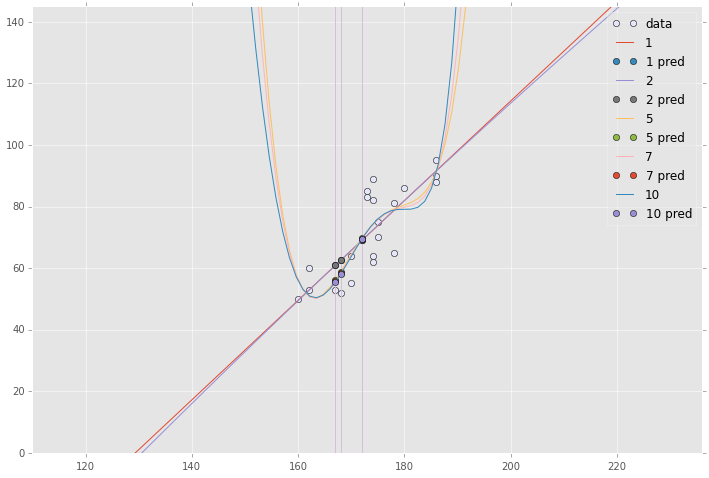

In [49]:
demo_1(hn, wn, hu, [1, 2, 5, 7, 10])

### for some noisy data for $x^2$

Coefficients
[ 405.89126566   32.19848583]

[ 2.67593218 -1.8121027   1.04158657]

[ -3.28507807e+01  -5.86163316e+00   1.25638298e+00   5.05422149e-03
  -3.05726176e-04   3.11264571e-06]

[ -1.32174880e+01   4.33369912e-01   7.15964088e-01  -3.31437736e-02
   1.77651279e-03   3.08269591e-05  -2.18833871e-06   2.34877207e-08]

[  4.05706957e-03   2.49186380e-02   2.39472148e-01  -3.33043551e-02
   1.43925371e-03   2.44202280e-05   3.25067091e-06  -8.92452273e-08
  -5.21818418e-09   1.88620726e-10  -1.59967872e-12]

Predictions [1, 2, 5, 7, 10]
11: 7.6e+02 |1.09e+02 |57.4 |61.6 |13.2 |
22: 1.11e+03 |4.67e+02 |4.45e+02 |3.75e+02 |2.7e+02 |
33: 1.47e+03 |1.08e+03 |1.08e+03 |1.08e+03 |1.09e+03 |
44: 1.82e+03 |1.94e+03 |1.94e+03 |1.93e+03 |1.92e+03 |


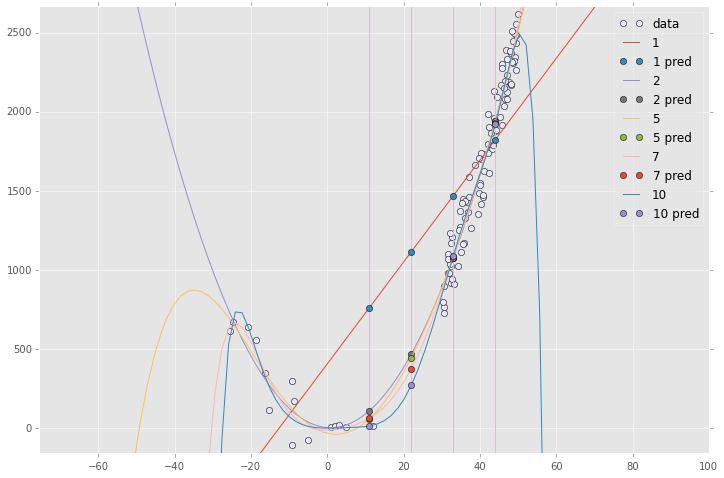

In [74]:
demo_1(qx, qy, qu, [1, 2, 5, 7, 10])

More, later with Task 2.3

## Task 2.2
### Conditional Expectation from a Bivariate Gaussain

- We used the equations from the slides for fitting a Bivariate Gaussian

$$
\mathbf{E} \left[w \mid h = h_0 \right] = 
\int w 
\mathcal{N} \left(w \mid \mu_{w \mid h=h_0}, \sigma^2_{w \mid h=h_0} \right) dw
$$

    where

$$
\mu_{w \mid h=h_0} = \mu_{w} + \rho \frac{\sigma_w}{\sigma_h}(h_0 - \mu_h) \\
\sigma^2_{w \mid h=h_0} = \sigma^2_w (1-\rho^2) \\
\rho = \frac{cov(h, w)}{\sigma_h \sigma_w}
$$

- We used `numpy.cov(...)` to calculate the covariance 
    
    + by default, the normalization is by `N-1`.
    
    + for MLE estimate, use `ddof=0`
    
    + we used the default, but standard-deviation is still biased

- for the correlation coefficient $\rho$, one can also use `numpy.corrcoef(...)`


In [9]:
def demo_2(x, y, u, ddof=None):
    XY = np.vstack((x, y))
    res = fit_rex.fit_multivariate_normal_dist(XY, ddof=ddof
                                               , padding=50, get_pdf=True
                                               , X_unknown=u, X_unknown_dim=0)
    coeff = res[0]
    line = res[1]
    pred = res[2]
    xypdf = res[3]
    
    preds = []
    preds_string = "{}: "

    preds.append(pred[1])
    preds_string += "{:4.3} |"
    
    fig = plt.figure(figsize=(12, 8))
    axs = fig.add_subplot(111)
    
    xmin, ymin = XY.min(axis=1)
    xmax, ymax = XY.max(axis=1)

    xlim = [xmin-50, xmax+50]
    ylim = [ymin-50, ymax+50]

    # plot data
    plt_rex.plot2d(XY, colwise_data=True, 
                   hatch='o', color='lavender',
                   x_lim=xlim, y_lim=ylim, 
                   show=False, axs=axs, plotlabel="data")

    # plot unkown vertical lines
    for h in u:
        axs.axvline(x=h, color='thistle')

    plt_rex.plot2d(np.vstack(line), colwise_data=True,
                  hatch='-',
                  show=False, axs=axs,
                  plotlabel="cond_exp")
    
    plt_rex.plot2d(np.vstack(pred), colwise_data=True,
                  hatch='o',
                  show=False, axs=axs,
                  plotlabel="pred")
        
    axs.contour(*xypdf)

    print("Coefficients")
    print("\n".join("{} {}".format(*c) for c 
                    in zip(["mean\n", "covariance\n", "corr\n"], coeff)))
    print()
    print("Predictions")
    print("\n".join(preds_string.format(*p) for p in zip(u, *preds)))

    

Coefficients
mean
 [ 173.57142857   71.52380952]
covariance
 [[  55.05714286   89.08571429]
 [  89.08571429  219.46190476]]
corr
 0.8104414767618634

Predictions
168.0: 62.5 |
172.0: 69.0 |
167.0: 60.9 |


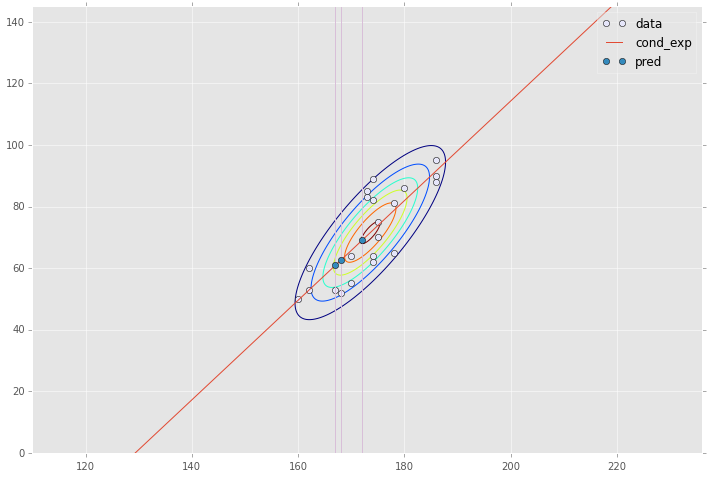

In [10]:
demo_2(hn, wn, hu)

- As expected, the conditional expectation gives a straight line through the mean

- **But**, why is it not cutting through the center evenly?
    
    + is it because of the *still* biased standard deviations?

### for some noisy data for $x^2$

Coefficients
mean
 [   33.71618456  1501.88284025]
covariance
 [[  3.56000529e+02   1.10312542e+04]
 [  1.10312542e+04   4.76741587e+05]]
corr
 0.8467555462827683

Predictions
11: 7.98e+02 |
22: 1.14e+03 |
33: 1.48e+03 |
44: 1.82e+03 |


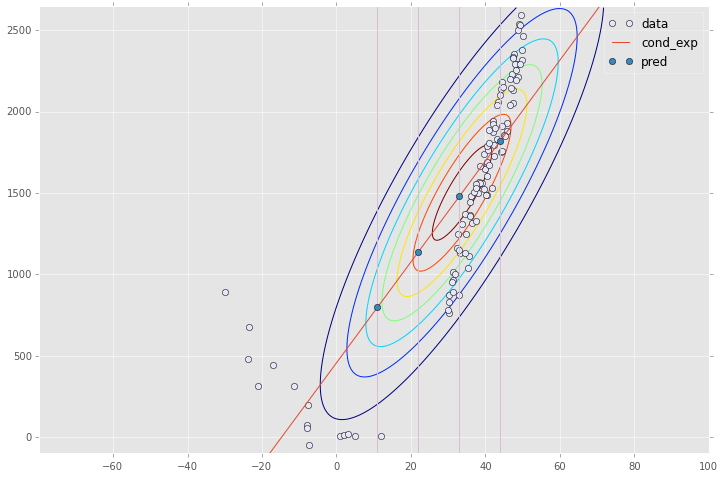

In [11]:
demo_2(qx, qy, qu)